In [1]:
import pandas as pd

file_path = "附件1 (Attachment 1).xlsx"
data = pd.read_excel(file_path)
data.head()

,电磁辐射 (EMR),时间 (time),类别 (class)
0,40.00,2019-01-09 05:01:29,D/E
1,43.59,2019-01-09 05:01:29,D/E
2,35.00,2019-01-09 05:02:00,D/E
3,34.00,2019-01-09 05:02:31,D/E
4,36.00,2019-01-09 05:03:02,D/E


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sheet1_data = pd.read_excel(file_path, sheet_name=0)  
sheet2_data = pd.read_excel(file_path, sheet_name=1) 

In [4]:
def calculate_features(data, value_col, window_size=3):
    features_df = pd.DataFrame()
    features_df['前兆信号'] = (data['类别 (class)'] == 'B').astype(int)
    
    # 基本滚动窗口特征
    features_df['rolling_mean'] = data[value_col].rolling(window=window_size).mean()
    features_df['rolling_std'] = data[value_col].rolling(window=window_size).std()
    features_df['rolling_var'] = data[value_col].rolling(window=window_size).var()
    
    # 指数平滑特征
    features_df['ewm_mean'] = data[value_col].ewm(span=window_size).mean()
    features_df['ewm_std'] = data[value_col].ewm(span=window_size).std()
    
    # 拉格特征
    features_df['lag_1'] = data[value_col].shift(1)
    features_df['lag_2'] = data[value_col].shift(2)
    
    # 季节性特征 - 时间维度
    data['时间 (time)'] = pd.to_datetime(data['时间 (time)'])  # 确保时间列的数据类型为 datetime
    features_df['day_of_week'] = data['时间 (time)'].dt.weekday
    features_df['is_weekend'] = (features_df['day_of_week'] >= 5).astype(int)
    
    # 趋势特征
    features_df['trend'] = data[value_col].diff().rolling(window=window_size).mean()
    
    # 周期性特征
    features_df['seasonality'] = data[value_col].diff(7)  # 周期为7天
    
    # 窗口统计特征
    features_df['long_rolling_mean'] = data[value_col].rolling(window=7).mean()
    features_df['short_rolling_mean'] = data[value_col].rolling(window=3).mean()
    
    # 差分特征
    features_df['diff_1'] = data[value_col].diff()
    features_df['diff_2'] = data[value_col].diff().diff()
    
    # 连接原始数据和衍生特征
    features_df.index = data.index
    result = pd.concat([data, features_df], axis=1)
    return result

# 计算每个工作表的特征，并保存结果
sheet1_features = calculate_features(sheet1_data, '电磁辐射 (EMR)')
sheet2_features = calculate_features(sheet2_data, '声波强度 (AE)')


In [5]:
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    这个函数绘制并返回混淆矩阵。
    如果 normalize=True，混淆矩阵将会归一化。
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("归一化混淆矩阵")
    else:
        print('非归一化混淆矩阵')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('实际类别')
    plt.xlabel('预测类别')


电磁辐射 (EMR) 模型评价指标:
Epoch 1/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - accuracy: 0.6401 - loss: 0.6348
Epoch 2/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - accuracy: 0.6824 - loss: 0.5779
Epoch 3/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - accuracy: 0.6963 - loss: 0.5563
Epoch 4/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - accuracy: 0.7125 - loss: 0.5404
Epoch 5/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - accuracy: 0.7196 - loss: 0.5330
Epoch 6/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - accuracy: 0.7337 - loss: 0.5213
Epoch 7/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.7630 - loss: 0.5033
Epoch 8/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.7689 - loss: 0.4942
Epoch 9/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.7704 - loss: 0.4870
Epoch 10/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - accuracy: 0.7701 - loss: 0.4844
准确率: 0.8278699517250061
5728/5728 ━━━━━━━━━━━━━━━━━━━━ 1s 179us/step


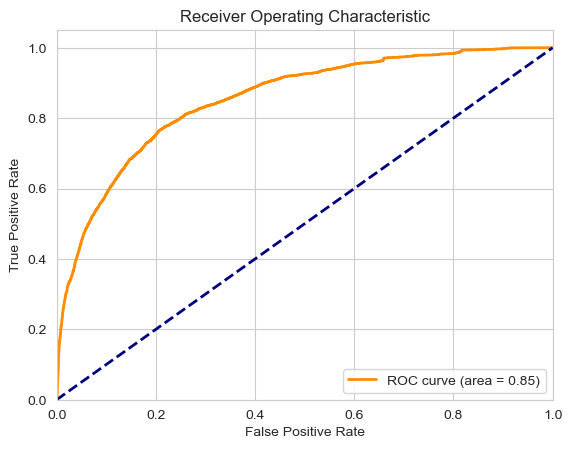

电磁辐射 (EMR) 模型评价指标:
Epoch 1/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.6451 - loss: 0.6364
Epoch 2/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - accuracy: 0.6719 - loss: 0.5856
Epoch 3/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - accuracy: 0.6893 - loss: 0.5641
Epoch 4/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - accuracy: 0.7208 - loss: 0.5372
Epoch 5/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.7255 - loss: 0.5256
Epoch 6/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - accuracy: 0.7371 - loss: 0.5150
Epoch 7/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.7532 - loss: 0.5128
Epoch 8/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.7664 - loss: 0.4928
Epoch 9/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - accuracy: 0.7691 - loss: 0.4822
Epoch 10/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.7788 - loss: 0.4754
准确率: 0.7494489550590515
5728/5728 ━━━━━━━━━━━━━━━━━━━━ 1s 177us/step


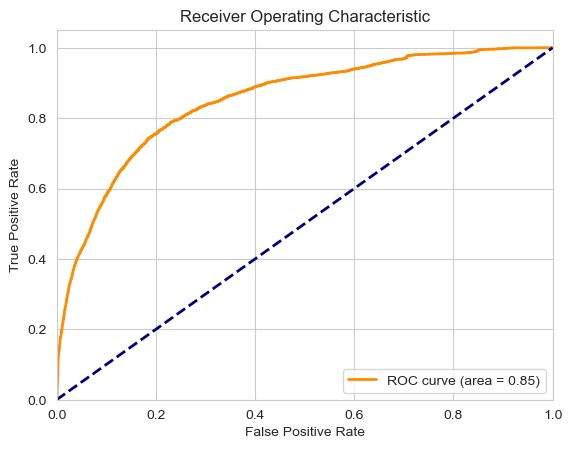

声波强度 (AE) 模型评价指标:
Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.7457 - loss: 0.5812 
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.8105 - loss: 0.4421
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.8234 - loss: 0.4114
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.8263 - loss: 0.4064
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.8334 - loss: 0.4040
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.8327 - loss: 0.3896
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - accuracy: 0.8373 - loss: 0.3907
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.8299 - loss: 0.3877
Epoch 9/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.8302 - loss: 0.3869
Epoch 10/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.8331 - loss: 0.3942
准确率: 0.8052807450294495
5737/5737 ━━━━━━━━━━━━━━━━━━━━ 1s 179us/step


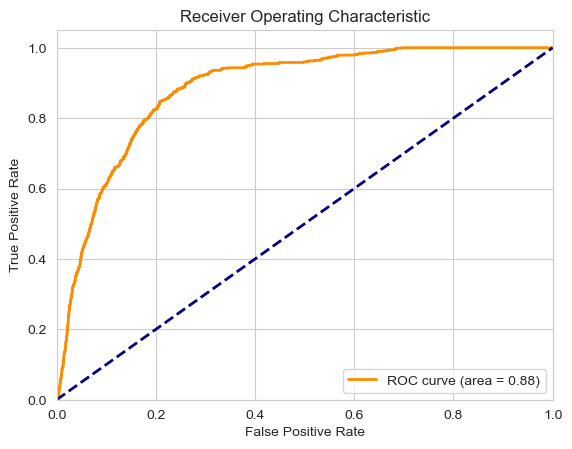

声波强度 (AE) 模型评价指标:
Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.7098 - loss: 0.5917 
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - accuracy: 0.7998 - loss: 0.4629
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.8094 - loss: 0.4285
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.8172 - loss: 0.4169
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.8208 - loss: 0.4033
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.8322 - loss: 0.3877
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.8206 - loss: 0.4064
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.8337 - loss: 0.3811
Epoch 9/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.8363 - loss: 0.3839
Epoch 10/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.8248 - loss: 0.3863
准确率: 0.7925119400024414
5737/5737 ━━━━━━━━━━━━━━━━━━━━ 1s 180us/step


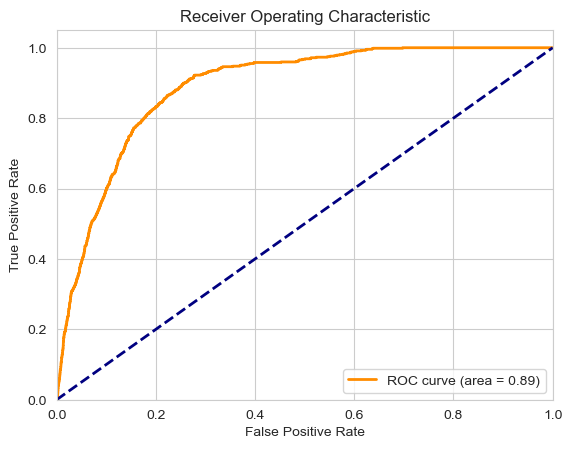

(<Sequential name=sequential_3, built=True>, SimpleImputer(), StandardScaler())

In [6]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def train_and_return_model(features, target):
    # 分割数据为训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

    # 创建一个填充实例并转换训练和测试数据
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # 应用欠采样
    rus = RandomUnderSampler(random_state=42)
    X_train_resampled, y_train_resampled = rus.fit_resample(X_train_imputed, y_train)

    # 数据标准化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test_imputed)

    # 构建神经网络模型
    clc = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    clc.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # 训练模型
    clc.fit(X_train_scaled, y_train_resampled, epochs=10, batch_size=32, verbose=1)

    # 在测试集上评估模型
    loss, accuracy = clc.evaluate(X_test_scaled, y_test, verbose=0)
    print("准确率:", accuracy)

    # 预测概率
    y_probs = clc.predict(X_test_scaled)

    # 计算ROC曲线
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # 绘制ROC曲线
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    return clc, imputer, scaler
X_emr = sheet1_features.drop(['前兆信号', '类别 (class)', '时间 (time)'], axis=1)
y_emr = sheet1_features['前兆信号']
print("电磁辐射 (EMR) 模型评价指标:")
train_and_return_model(X_emr, y_emr)
print("电磁辐射 (EMR) 模型评价指标:")
train_and_return_model(X_emr, y_emr)

X_ae = sheet2_features.drop(['前兆信号', '类别 (class)', '时间 (time)'], axis=1)
y_ae = sheet2_features['前兆信号']
# 假设 X_ae 和 y_ae 已经被定义
print("声波强度 (AE) 模型评价指标:")
train_and_return_model(X_ae, y_ae)
print("声波强度 (AE) 模型评价指标:")
train_and_return_model(X_ae, y_ae)


In [28]:
import pandas as pd
EMR_df = pd.read_excel("./附件3 (Attachment 3).xlsx", sheet_name='EMR',skiprows=1)
AE_df = pd.read_excel("./附件3 (Attachment 3).xlsx", sheet_name='AE', skiprows=1)
EMR_df = EMR_df.iloc[:,[8,9]]
EMR_df = EMR_df.dropna()
AE_df = AE_df.iloc[:,[8,9]]
AE_df = AE_df.dropna()
EMR_df = EMR_df.rename(columns=lambda x: x.replace('.4', ''))
AE_df = AE_df.rename(columns=lambda x: x.replace('.4', ''))

In [29]:
def calculate_features(data, value_col, window_size=3):
    features_df = pd.DataFrame()
    
    # 基本滚动窗口特征
    features_df['rolling_mean'] = data[value_col].rolling(window=window_size).mean()
    features_df['rolling_std'] = data[value_col].rolling(window=window_size).std()
    features_df['rolling_var'] = data[value_col].rolling(window=window_size).var()
    
    # 指数平滑特征
    features_df['ewm_mean'] = data[value_col].ewm(span=window_size).mean()
    features_df['ewm_std'] = data[value_col].ewm(span=window_size).std()
    
    # 拉格特征
    features_df['lag_1'] = data[value_col].shift(1)
    features_df['lag_2'] = data[value_col].shift(2)
    
    # 季节性特征 - 时间维度
    data['时间 (time)'] = pd.to_datetime(data['时间 (time)'])  # 确保时间列的数据类型为 datetime
    features_df['day_of_week'] = data['时间 (time)'].dt.weekday
    features_df['is_weekend'] = (features_df['day_of_week'] >= 5).astype(int)
    
    # 趋势特征
    features_df['trend'] = data[value_col].diff().rolling(window=window_size).mean()
    
    # 周期性特征
    features_df['seasonality'] = data[value_col].diff(7)  # 周期为7天
    
    # 窗口统计特征
    features_df['long_rolling_mean'] = data[value_col].rolling(window=7).mean()
    features_df['short_rolling_mean'] = data[value_col].rolling(window=3).mean()
    
    # 差分特征
    features_df['diff_1'] = data[value_col].diff()
    features_df['diff_2'] = data[value_col].diff().diff()
    
    # 连接原始数据和衍生特征
    features_df.index = data.index
    result = pd.concat([data, features_df], axis=1)
    return result
EMR_df_processed = calculate_features(EMR_df, value_col='电磁辐射 (EMR)')
AE_df_processed = calculate_features(AE_df, value_col='声波强度 (AE)')

Epoch 1/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - accuracy: 0.6519 - loss: 0.6354
Epoch 2/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.6870 - loss: 0.5798
Epoch 3/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - accuracy: 0.6938 - loss: 0.5621
Epoch 4/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.6931 - loss: 0.5521
Epoch 5/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - accuracy: 0.7109 - loss: 0.5470
Epoch 6/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.7212 - loss: 0.5354
Epoch 7/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - accuracy: 0.7338 - loss: 0.5239
Epoch 8/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - accuracy: 0.7419 - loss: 0.5180
Epoch 9/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.7577 - loss: 0.5015
Epoch 10/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - accuracy: 0.7606 - loss: 0.4978
准确率: 0.7678688168525696
5728/5728 ━━━━━━━━━━━━━━━━━━━━ 1s 180us/step


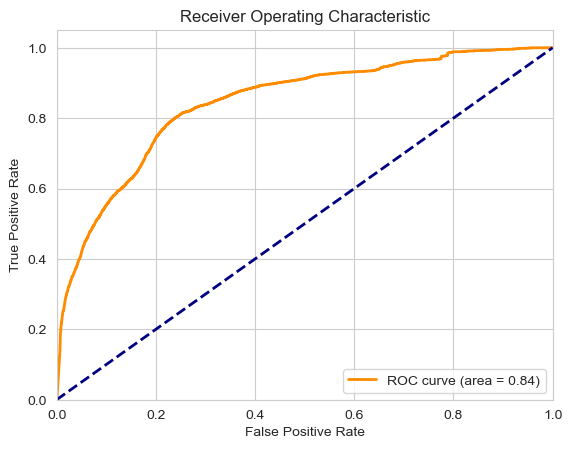

Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.7256 - loss: 0.5681 
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.8079 - loss: 0.4450
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.8184 - loss: 0.4076
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.8192 - loss: 0.3994
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.8331 - loss: 0.3910
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.8247 - loss: 0.4114
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.8243 - loss: 0.3922
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.8326 - loss: 0.4031
Epoch 9/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.8391 - loss: 0.3878
Epoch 10/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.8296 - loss: 0.3996
准确率: 0.8283616304397583
5737/5737 ━━━━━━━━━━━━━━━━━━━━ 1s 179us/step


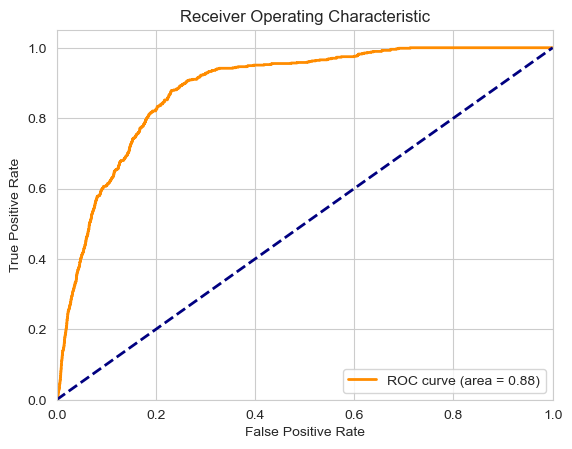

In [30]:
clf_emr, imputer_emr, scaler_emr = train_and_return_model(X_emr, y_emr)
clf_ae, imputer_ae, scaler_ae = train_and_return_model(X_ae, y_ae)


In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# 转换时间列为 datetime 类型
EMR_df_processed['时间 (time)'] = pd.to_datetime(EMR_df_processed['时间 (time)'])
AE_df_processed['时间 (time)'] = pd.to_datetime(AE_df_processed['时间 (time)'])

# 保存时间列以备后用
EMR_times = EMR_df_processed['时间 (time)'].copy()
AE_times = AE_df_processed['时间 (time)'].copy()

# 预处理数据（移除时间列进行预测）
EMR_df_imputed = imputer_emr.transform(EMR_df_processed.drop(columns=['时间 (time)']))
AE_df_imputed = imputer_ae.transform(AE_df_processed.drop(columns=['时间 (time)']))

# 使用模型进行预测概率
EMR_probabilities = clf_emr.predict(EMR_df_imputed)
AE_probabilities = clf_ae.predict(AE_df_imputed)

# 将预测概率和预测结果加入数据框
EMR_df_processed['前兆信号'] = (EMR_probabilities > 0.5).astype(int)  # 使用阈值0.5将概率转换为二进制结果
EMR_df_processed['前兆信号概率'] = EMR_probabilities.flatten()  # 添加概率列，确保它是1维数组
AE_df_processed['前兆信号'] = (AE_probabilities > 0.5).astype(int)  # 使用阈值0.5将概率转换为二进制结果
AE_df_processed['前兆信号概率'] = AE_probabilities.flatten()  # 添加概率列，确保它是1维数组

# 将时间列加回数据框
EMR_df_processed['时间 (time)'] = EMR_times
AE_df_processed['时间 (time)'] = AE_times

# 进行预测和处理数据
def process_and_save_probabilities(df_processed, clf, imputer, filename):
    # 移除并保存时间列
    times = df_processed['时间 (time)'].copy()
    
    # 移除非训练时使用的列
    columns_to_use = df_processed.columns[df_processed.columns != '时间 (time)']
    columns_to_use = columns_to_use[~columns_to_use.isin(['前兆信号', '前兆信号概率'])]  # 确保只包含训练时用的特征
    df_imputed = imputer.transform(df_processed[columns_to_use])
    
    probabilities = clf.predict(df_imputed).flatten()
    
    results_df = pd.DataFrame({
        '时间 (time)': times,
        '前兆信号概率': probabilities
    })
    
    results_df.to_csv(filename, index=False)
    print(f"数据已保存至 '{filename}'.")


process_and_save_probabilities(EMR_df_processed, clf_emr, imputer_emr, 'EMR_probabilities时间段5 (time period 5).csv')
process_and_save_probabilities(AE_df_processed, clf_ae, imputer_ae, 'AE_probabilities时间段5 (time period 5).csv')


174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step
数据已保存至 'EMR_probabilities时间段5 (time period 5).csv'.
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step
数据已保存至 'AE_probabilities时间段5 (time period 5).csv'.
